# Hourly Electricity Consumption and Production
# Project Description :

This project focuses on analyzing historical hourly electricity consumption and production data to understand how energy demand changes over time. Electricity usage follows clear temporal patterns influenced by human activity, industry, and environmental conditions. By studying these variations and the contribution of different energy sources, the project aims to build accurate forecasting models that can anticipate future demand.

# Objective:

The objective of this project is to develop predictive models—using both machine learning and deep learning—to forecast future electricity consumption based on historical data. By identifying trends, seasonality, and production–consumption relationships, the project aims to support better decision-making for load planning and resource management.

# Install and Import Libraries

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Deep Learning imports (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("Library Import Summary")
print("=" * 60)
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ TensorFlow version: {tf.__version__}")
print("✓ All libraries imported successfully - Ready for deep learning models")
print("=" * 60)


Library Import Summary
✓ Pandas version: 2.3.3
✓ NumPy version: 2.2.6
✓ TensorFlow version: 2.20.0
✓ All libraries imported successfully - Ready for deep learning models


# I) Data preprocessing :
 **1- Data overview**
Let's start by loading the dataset and getting a basic understanding of its structure.

In [35]:
# Load the dataset
df = pd.read_csv(r"C:\Users\asus\Desktop\electricityConsumptionAndProductioction.csv")

# Display first few rows
print("="*60)
print("FIRST 5 ROWS")
print("="*60)
print(df.head())

print("\n" + "="*60)
print("DATASET SHAPE")
print("="*60)
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

print("\n" + "="*60)
print("COLUMN NAMES")
print("="*60)
print(df.columns.tolist())


FIRST 5 ROWS
              DateTime  Consumption  Production  Nuclear  Wind  Hydroelectric  \
0  2019-01-01 00:00:00         6352        6527     1395    79           1383   
1  2019-01-01 01:00:00         6116        5701     1393    96           1112   
2  2019-01-01 02:00:00         5873        5676     1393   142           1030   
3  2019-01-01 03:00:00         5682        5603     1397   191            972   
4  2019-01-01 04:00:00         5557        5454     1393   159            960   

   Oil and Gas  Coal  Solar  Biomass  
0         1896  1744      0       30  
1         1429  1641      0       30  
2         1465  1616      0       30  
3         1455  1558      0       30  
4         1454  1458      0       30  

DATASET SHAPE
Rows: 54,170
Columns: 10

COLUMN NAMES
['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']


**1- Understanding our data**

**– Description:** This dataset contains several years of hourly electricity consumption and production data. It is highly suitable for time-series analysis and forecasting because it captures long-term trends, daily/weekly seasonality, and the behavior of different energy sources over time.

**– Features:**

1. **DateTime:** The timestamp of each hourly observation. This will serve as the time index for analysis and modeling.

2. **Consumption:** The total electricity consumption recorded during that hour. This is the target variable for forecasting.

3. **Production:** The total electricity production for that hour, obtained by summing all energy sources.

4. **Nuclear:** Electricity production from nuclear power plants.

5. **Wind:** Electricity generated from wind turbines.

6. **Hydroelectric:** Power generation from hydroelectric sources.

7. **Oil and Gas:** Electricity production from oil and natural gas facilities.

8. **Coal:** Electricity generated from coal-fired power plants.

9. **Solar:** Power production from solar energy.

10. **Biomass:** Electricity generated from biomass sources.

**2- Exploring the dataset**
+ Time Range:

Start: January 1, 2019

End: March 19, 2025

Duration: Approximately 7 years of hourly data

+ Time Granularity:

The data is recorded at an hourly frequency, giving 8,760 data points per year.

+ Target Variable:

The Consumption column, representing the total electricity consumed during each hour.

**Checking for random walk :**

In [38]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv(r"C:\Users\asus\Desktop\electricityConsumptionAndProductioction.csv")
# Perform the Augmented Dickey-Fuller (ADF) Test
adf_stat, adf_p_value, _, _, critical_values, _ = adfuller(data['Consumption'])

# Output the results of the ADF test
print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {adf_p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f'\t{key}: {value}')

# Check if the p-value is greater than 0.05
if adf_p_value > 0.05:
    print("The data is likely a random walk (non-stationary).")
else:
    print("The data is not a random walk.")


ADF Statistic: -14.412672382263976
p-value: 8.155424801128213e-27
Critical Values:
	1%: -3.4304708554682284
	5%: -2.861593415724349
	10%: -2.5667984314078804
The data is not a random walk.


**Check data types :**

In [40]:
print("="*60)
print("DATA TYPES")
print("="*60)
print(df.dtypes)

print("\n" + "="*60)
print("BASIC INFORMATION")
print("="*60)
print(df.info())


DATA TYPES
DateTime         object
Consumption       int64
Production        int64
Nuclear           int64
Wind              int64
Hydroelectric     int64
Oil and Gas       int64
Coal              int64
Solar             int64
Biomass           int64
dtype: object

BASIC INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54170 entries, 0 to 54169
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       54170 non-null  object
 1   Consumption    54170 non-null  int64 
 2   Production     54170 non-null  int64 
 3   Nuclear        54170 non-null  int64 
 4   Wind           54170 non-null  int64 
 5   Hydroelectric  54170 non-null  int64 
 6   Oil and Gas    54170 non-null  int64 
 7   Coal           54170 non-null  int64 
 8   Solar          54170 non-null  int64 
 9   Biomass        54170 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 4.1+ MB
None


**Check for missing values and duplicate rows
:**

In [42]:
print("="*60)
print("MISSING VALUES CHECK")
print("="*60)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

print("\n" + "="*60)
print("DUPLICATE ROWS CHECK")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()
df.shape

MISSING VALUES CHECK
DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

Total missing values: 0

DUPLICATE ROWS CHECK
Number of duplicate rows: 4


(54166, 10)

- **Explanation:** Duplicates found and dropped and no missing values found. This data is now clean and with good quality.

In [44]:
# Convert DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as index
df.set_index('DateTime', inplace=True)

# Display date range
print("="*60)
print("DATE RANGE")
print("="*60)
print(f"Start date: {df.index.min()}")
print(f"End date: {df.index.max()}")
print(f"Total duration: {df.index.max() - df.index.min()}")

# Check if data is continuous (hourly)
print("\n" + "="*60)
print("TIME SERIES FREQUENCY CHECK")
print("="*60)
expected_hours = (df.index.max() - df.index.min()).total_seconds() / 3600 + 1
actual_hours = len(df)
print(f"Expected hours (continuous): {expected_hours:,.0f}")
print(f"Actual hours in dataset: {actual_hours:,}")
print(f"Missing hours: {expected_hours - actual_hours:,.0f}")


DATE RANGE
Start date: 2019-01-01 00:00:00
End date: 2025-03-19 23:00:00
Total duration: 2269 days 23:00:00

TIME SERIES FREQUENCY CHECK
Expected hours (continuous): 54,480
Actual hours in dataset: 54,166
Missing hours: 314


**Display basic statistics :**

In [46]:
print("="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
print(df.describe())


DESCRIPTIVE STATISTICS
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  54166.000000  54166.000000  54166.000000  54166.000000   54166.000000   
mean    6526.571613   6380.274563   1282.471883    771.748735    1792.697301   
std     1048.208104   1015.366137    241.195613    666.543637     679.973372   
min     2922.000000   3119.000000    562.000000    -26.000000     175.000000   
25%     5711.000000   5640.000000   1341.000000    228.000000    1281.000000   
50%     6474.000000   6322.000000   1378.000000    571.000000    1679.000000   
75%     7268.000000   7058.000000   1400.000000   1167.000000    2191.000000   
max     9615.000000   9886.000000   1457.000000   2811.000000    4434.000000   

        Oil and Gas          Coal         Solar       Biomass  
count  54166.000000  54166.000000  54166.000000  54166.000000  
mean    1166.864306   1138.492283    171.821069     54.938762  
std      433.929552    329.934698    257.262960     13.762206  


# II) Data Cleaning :

Now let's clean the data: handle any issues, check for outliers, and prepare it for analysis.


**Check for negative values (shouldn't exist for consumption/production) :**

In [49]:
print("="*60)
print("NEGATIVE VALUES CHECK")
print("="*60)
for col in df.columns:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values")
        print(f"  Min value: {df[col].min()}")
        print(f"  Sample negative values:")
        print(df[df[col] < 0][col].head())
    else:
        print(f"{col}: No negative values ✓")


NEGATIVE VALUES CHECK
Consumption: No negative values ✓
Production: No negative values ✓
Nuclear: No negative values ✓
Wind: 592 negative values
  Min value: -26
  Sample negative values:
DateTime
2019-01-01 10:00:00    -5
2019-01-01 11:00:00   -17
2019-01-01 12:00:00   -10
2019-01-27 11:00:00    -4
2019-01-27 12:00:00    -6
Name: Wind, dtype: int64
Hydroelectric: No negative values ✓
Oil and Gas: No negative values ✓
Coal: No negative values ✓
Solar: No negative values ✓
Biomass: No negative values ✓


**Check for outliers using IQR method :**

In [51]:
print("="*60)
print("OUTLIER DETECTION (IQR Method)")
print("="*60)

def detect_outliers_iqr(series, col_name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in df.columns:
    outliers, lower, upper = detect_outliers_iqr(df[col], col)
    print(f"\n{col}:")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0 and len(outliers) < 20:
        print(f"  Outlier values: {outliers.values[:10]}")


OUTLIER DETECTION (IQR Method)

Consumption:
  Lower bound: 3375.50
  Upper bound: 9603.50
  Number of outliers: 15 (0.03%)
  Outlier values: [9604 9615 3257 3098 2985 2922 2924 3019 3244 3262]

Production:
  Lower bound: 3513.00
  Upper bound: 9185.00
  Number of outliers: 193 (0.36%)

Nuclear:
  Lower bound: 1252.50
  Upper bound: 1488.50
  Number of outliers: 7875 (14.54%)

Wind:
  Lower bound: -1180.50
  Upper bound: 2575.50
  Number of outliers: 456 (0.84%)

Hydroelectric:
  Lower bound: -84.00
  Upper bound: 3556.00
  Number of outliers: 914 (1.69%)

Oil and Gas:
  Lower bound: -115.00
  Upper bound: 2485.00
  Number of outliers: 0 (0.00%)

Coal:
  Lower bound: 188.00
  Upper bound: 2060.00
  Number of outliers: 341 (0.63%)

Solar:
  Lower bound: -453.00
  Upper bound: 755.00
  Number of outliers: 1762 (3.25%)

Biomass:
  Lower bound: 15.00
  Upper bound: 95.00
  Number of outliers: 0 (0.00%)


- **Explanation:** We'll keep all data points for now. Negative values in Wind/Solar might be valid.


# III) Exploratory Data Analysis (EDA)

Let's visualize and understand the patterns in our data.


**Consumption and Production over time (first 1000 hours for clarity) :**


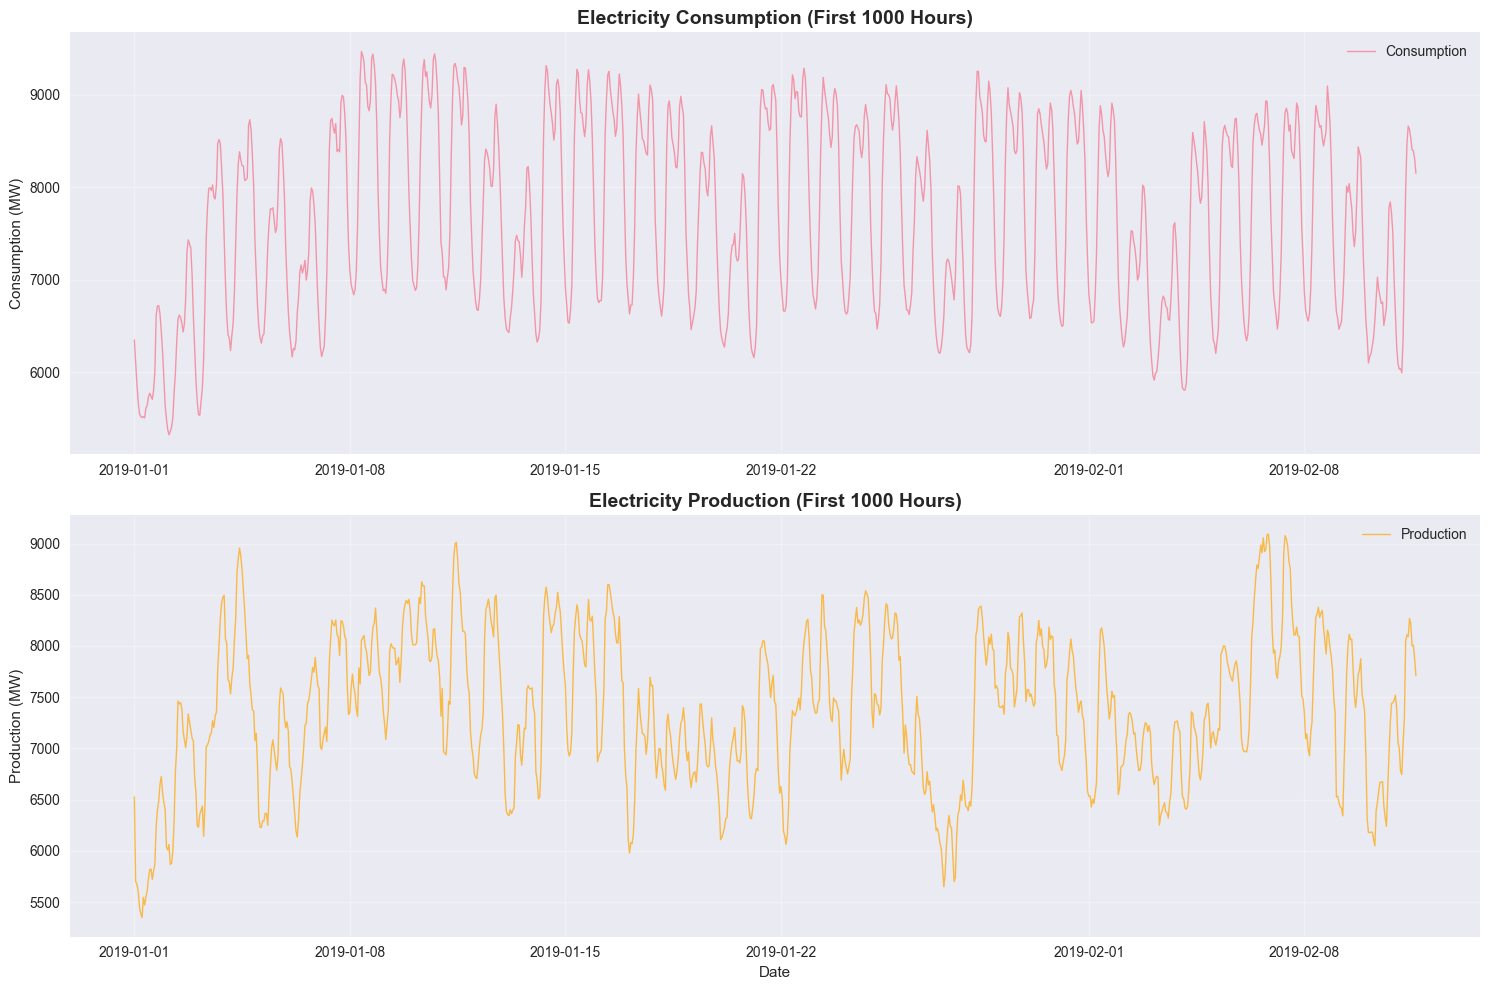

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot consumption
sample_data = df.head(1000)
axes[0].plot(sample_data.index, sample_data['Consumption'], 
            label='Consumption', linewidth=1, alpha=0.7)
axes[0].set_title('Electricity Consumption (First 1000 Hours)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Consumption (MW)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot production
axes[1].plot(sample_data.index, sample_data['Production'], 
            label='Production', linewidth=1, alpha=0.7, color='orange')
axes[1].set_title('Electricity Production (First 1000 Hours)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Production (MW)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Production sources over time :**

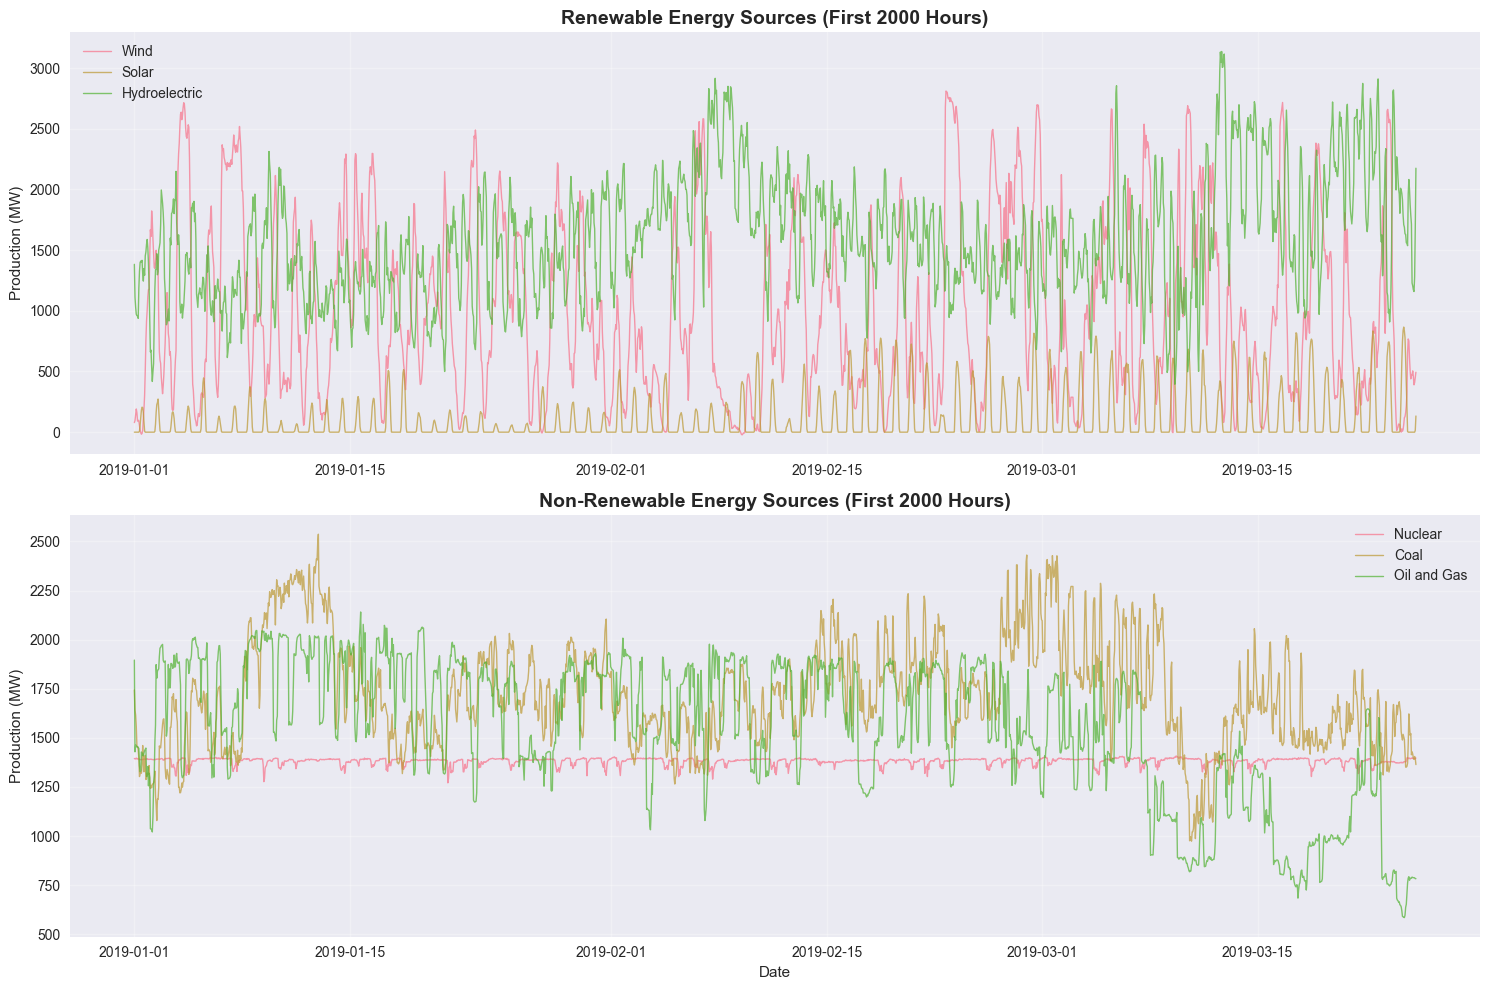

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Top panel: Renewable sources
sample_data = df.head(2000)
axes[0].plot(sample_data.index, sample_data['Wind'], label='Wind', alpha=0.7, linewidth=1)
axes[0].plot(sample_data.index, sample_data['Solar'], label='Solar', alpha=0.7, linewidth=1)
axes[0].plot(sample_data.index, sample_data['Hydroelectric'], label='Hydroelectric', alpha=0.7, linewidth=1)
axes[0].set_title('Renewable Energy Sources (First 2000 Hours)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Production (MW)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bottom panel: Non-renewable sources
axes[1].plot(sample_data.index, sample_data['Nuclear'], label='Nuclear', alpha=0.7, linewidth=1)
axes[1].plot(sample_data.index, sample_data['Coal'], label='Coal', alpha=0.7, linewidth=1)
axes[1].plot(sample_data.index, sample_data['Oil and Gas'], label='Oil and Gas', alpha=0.7, linewidth=1)
axes[1].set_title('Non-Renewable Energy Sources (First 2000 Hours)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Production (MW)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Distribution of Consumption :**

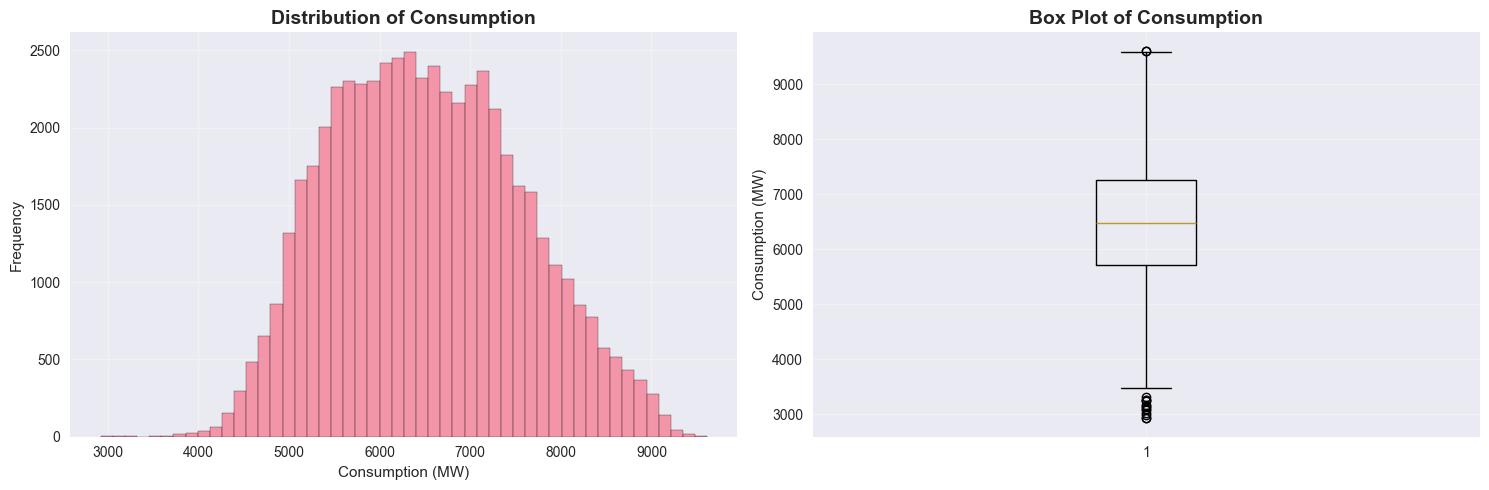

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Consumption'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Consumption', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Consumption (MW)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Consumption'], vert=True)
axes[1].set_title('Box Plot of Consumption', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Consumption (MW)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Correlation matrix :**

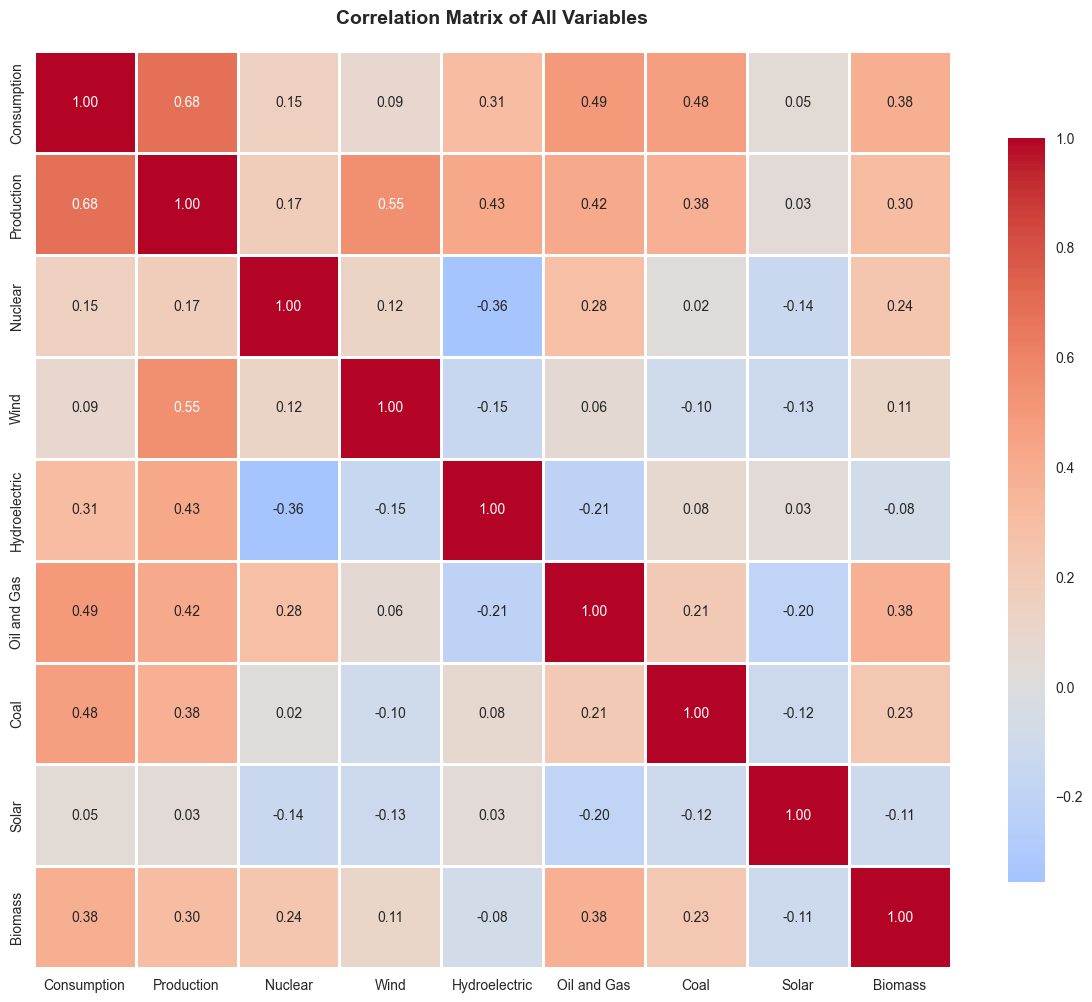

Plot 4: Correlation matrix

Key insights:
- Consumption vs Production correlation: 0.681
- Consumption vs Nuclear correlation: 0.148
- Consumption vs Wind correlation: 0.088


In [61]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Plot 4: Correlation matrix")
print("\nKey insights:")
print(f"- Consumption vs Production correlation: {correlation_matrix.loc['Consumption', 'Production']:.3f}")
print(f"- Consumption vs Nuclear correlation: {correlation_matrix.loc['Consumption', 'Nuclear']:.3f}")
print(f"- Consumption vs Wind correlation: {correlation_matrix.loc['Consumption', 'Wind']:.3f}")


**Hourly patterns (average consumption by hour of day) :**

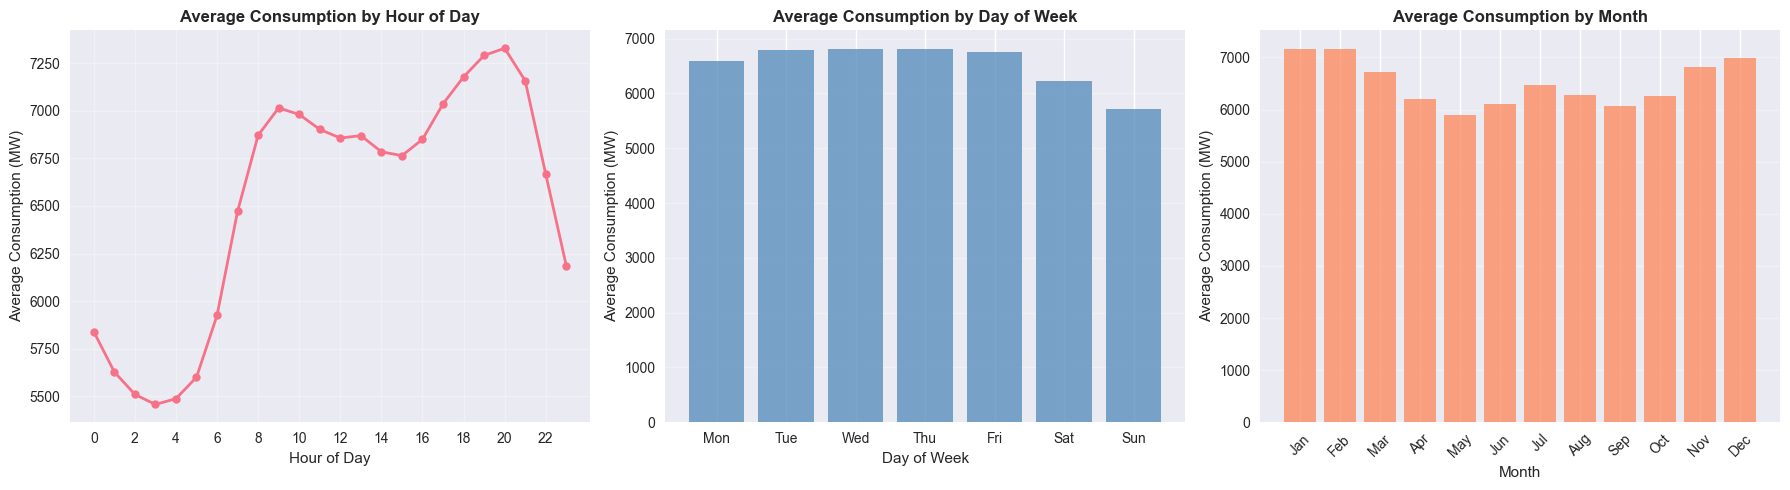

Plot 5: Temporal patterns (Hour, Day, Month)


In [63]:
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

hourly_avg = df.groupby('Hour')['Consumption'].mean()
day_of_week_avg = df.groupby('DayOfWeek')['Consumption'].mean()
monthly_avg = df.groupby('Month')['Consumption'].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hourly pattern
axes[0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Average Consumption by Hour of Day', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Consumption (MW)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Day of week pattern
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(day_names, day_of_week_avg.values, color='steelblue', alpha=0.7)
axes[1].set_title('Average Consumption by Day of Week', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Consumption (MW)')
axes[1].grid(True, alpha=0.3, axis='y')

# Monthly pattern
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[2].bar(month_names, monthly_avg.values, color='coral', alpha=0.7)
axes[2].set_title('Average Consumption by Month', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average Consumption (MW)')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Plot 5: Temporal patterns (Hour, Day, Month)")


# IV) Prepare Data for Modeling :

Now let's prepare the data for machine learning models by creating train/test splits and feature engineering.


**Define target, features, window, and train/test split :**

In [66]:
# Target and features
target_col = 'Consumption'
feature_cols = [c for c in df.columns if c != target_col]

window_size = 24      # use 24 past hours to predict the next hour
train_ratio = 0.8     # 80% of data for training

values = df[[target_col] + feature_cols].values
n_samples = len(values)
train_size = int(n_samples * train_ratio)

train_values = values[:train_size]
test_values = values[train_size - window_size:]  # include overlap for windows

print(f"Total samples: {n_samples}")
print(f"Train size: {train_size}")
print(f"Test (with overlap) size: {len(test_values)}")

# Scale all columns together
scaler_all = MinMaxScaler()
train_scaled = scaler_all.fit_transform(train_values)
test_scaled = scaler_all.transform(test_values)

n_features = train_scaled.shape[1]
print("Number of features (including target):", n_features)

Total samples: 54166
Train size: 43332
Test (with overlap) size: 10858
Number of features (including target): 12


**Create supervised sequences (X, y) :**

In [68]:
from typing import Tuple


def create_univariate_sequences(data: np.ndarray, window: int) -> Tuple[np.ndarray, np.ndarray]:
    """Use only the target (column 0) to create lagged input windows."""
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


# Univariate (for persistence/decision tree/baseline)
X_train_uni, y_train_uni = create_univariate_sequences(train_scaled, window_size)
X_test_uni, y_test_uni = create_univariate_sequences(test_scaled, window_size)

print("Univariate train shape:", X_train_uni.shape, y_train_uni.shape)
print("Univariate test shape:", X_test_uni.shape, y_test_uni.shape)


Univariate train shape: (43308, 24) (43308,)
Univariate test shape: (10834, 24) (10834,)


In [69]:
# invert scaling for the target and compute metrics

def invert_scale_target(scaled_target: np.ndarray) -> np.ndarray:
    """Invert MinMax scaling for the target column (assumed at index 0)."""
    dummy = np.zeros((len(scaled_target), n_features))
    dummy[:, 0] = scaled_target
    inv = scaler_all.inverse_transform(dummy)
    return inv[:, 0]


def evaluate(y_true_raw: np.ndarray, y_pred_raw: np.ndarray, name: str):
    rmse = np.sqrt(mean_squared_error(y_true_raw, y_pred_raw))
    mae = mean_absolute_error(y_true_raw, y_pred_raw)
    r2 = r2_score(y_true_raw, y_pred_raw)
    print(f"{name} -> RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

metrics = {}  # to store results


**1. Persistence model :**

In [71]:
series = df[target_col].values
train_series = series[:train_size]
test_series = series[train_size:]

print("Train length:", len(train_series))
print("Test length:", len(test_series))

# Naïve forecast: next value = last observed value
naive_preds = np.concatenate([[train_series[-1]], test_series[:-1]])

metrics['Persistent'] = evaluate(test_series, naive_preds, 'Persistent (naïve)')


Train length: 43332
Test length: 10834
Persistent (naïve) -> RMSE: 312.370, MAE: 237.482, R²: 0.904


**2. Arima with Grid search :**

In [73]:
from statsmodels.tsa.arima.model import ARIMA
p_values = [0, 1, 2, 3]
d_values = [0, 1]
q_values = [0, 1, 2, 3]

best_cfg = None
best_rmse = np.inf

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(train_series, order=order)
                result = model.fit()
                forecast = result.forecast(steps=len(test_series))
                rmse = np.sqrt(mean_squared_error(test_series, forecast))
                print(f"ARIMA{order} -> RMSE: {rmse:.3f}")
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_cfg = order
            except Exception as e:
                print(f"ARIMA{order} failed: {e}")

print("\nBest ARIMA order:", best_cfg, "with RMSE =", best_rmse)

# 5.2 Fit best ARIMA and store metrics
best_arima_model = ARIMA(train_series, order=best_cfg)
best_arima_result = best_arima_model.fit()
final_forecast = best_arima_result.forecast(steps=len(test_series))

metrics[f'ARIMA{best_cfg}'] = evaluate(test_series, final_forecast, f'ARIMA{best_cfg} (best grid search)')


ARIMA(0, 0, 0) -> RMSE: 1060.368
ARIMA(0, 0, 1) -> RMSE: 1060.324
ARIMA(0, 0, 2) -> RMSE: 1060.268
ARIMA(0, 0, 3) -> RMSE: 1060.237
ARIMA(0, 1, 0) -> RMSE: 1889.885
ARIMA(0, 1, 1) -> RMSE: 1818.290
ARIMA(0, 1, 2) -> RMSE: 1725.142
ARIMA(0, 1, 3) -> RMSE: 1641.723
ARIMA(1, 0, 0) -> RMSE: 1058.763
ARIMA(1, 0, 1) -> RMSE: 1059.216
ARIMA(1, 0, 2) -> RMSE: 1059.538
ARIMA(1, 0, 3) -> RMSE: 1059.719
ARIMA(1, 1, 0) -> RMSE: 1407.661
ARIMA(1, 1, 1) -> RMSE: 1557.649
ARIMA(1, 1, 2) -> RMSE: 1589.193
ARIMA(1, 1, 3) -> RMSE: 1138.845
ARIMA(2, 0, 0) -> RMSE: 1060.201
ARIMA(2, 0, 1) -> RMSE: 1060.043
ARIMA(2, 0, 2) -> RMSE: 1059.985
ARIMA(2, 0, 3) -> RMSE: 1059.967
ARIMA(2, 1, 0) -> RMSE: 1628.967
ARIMA(2, 1, 1) -> RMSE: 1101.978
ARIMA(2, 1, 2) -> RMSE: 1178.798
ARIMA(2, 1, 3) -> RMSE: 1200.752
ARIMA(3, 0, 0) -> RMSE: 1059.975
ARIMA(3, 0, 1) -> RMSE: 1059.947
ARIMA(3, 0, 2) -> RMSE: 1059.798
ARIMA(3, 0, 3) -> RMSE: 1059.985
ARIMA(3, 1, 0) -> RMSE: 1617.715
ARIMA(3, 1, 1) -> RMSE: 1200.331
ARIMA(3, 1

C:\Users\asus\anaconda3\envs\tf_clean\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) -> RMSE: 1192.888

Best ARIMA order: (1, 0, 0) with RMSE = 1058.762821883961
ARIMA(1, 0, 0) (best grid search) -> RMSE: 1058.763, MAE: 889.842, R²: -0.100


**3. Decision Tree :**

In [75]:
from sklearn.tree import DecisionTreeRegressor
# Inputs are already scaled in [0, 1]
X_train_tree = X_train_uni
X_test_tree = X_test_uni

tree = DecisionTreeRegressor(max_depth=10, random_state=42)

tree.fit(X_train_tree, y_train_uni)

y_pred_tree_scaled = tree.predict(X_test_tree)

# Invert scaling for y
y_test_raw = invert_scale_target(y_test_uni)
y_pred_raw = invert_scale_target(y_pred_tree_scaled)

metrics['DecisionTree'] = evaluate(y_test_raw, y_pred_raw, 'Decision Tree')


Decision Tree -> RMSE: 229.734, MAE: 157.272, R²: 0.948


**4. Comparaison :**

Model performance:
                       RMSE         MAE        R2
Persistent       312.370325  237.482093  0.904287
ARIMA(1, 0, 0)  1058.762822  889.842250 -0.099590
DecisionTree     229.733530  157.271599  0.948230


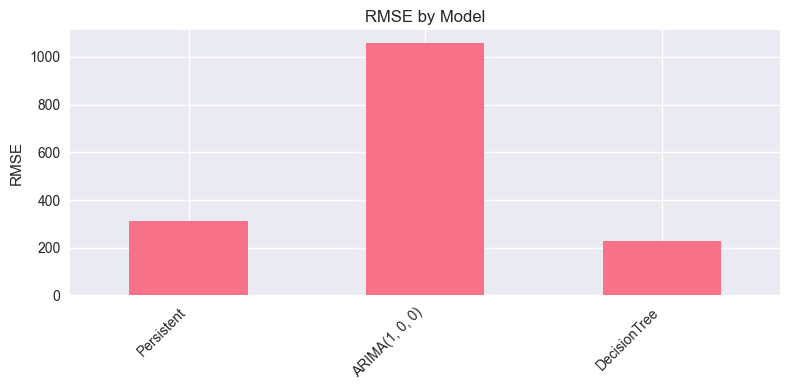

In [77]:
metrics_df = pd.DataFrame(metrics).T
print("Model performance:")
print(metrics_df)

# Optional: quick RMSE bar plot
metrics_df['RMSE'].plot(kind='bar', figsize=(8, 4), title='RMSE by Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [78]:
# Data preparation for deep learning models
target_col = 'Consumption'
feature_cols = [c for c in df.columns if c != target_col]

window_size = 24      # Use 24 past hours to predict the next hour
train_ratio = 0.8     # 80% of data for training

# Prepare data
values = df[[target_col] + feature_cols].values
n_samples = len(values)
train_size = int(n_samples * train_ratio)

train_values = values[:train_size]
test_values = values[train_size - window_size:]  # Include overlap for windows

print(f"Total samples: {n_samples:,}")
print(f"Train size: {train_size:,}")
print(f"Test size (with overlap): {len(test_values):,}")

# Scale all columns together
scaler_all = MinMaxScaler()
train_scaled = scaler_all.fit_transform(train_values)
test_scaled = scaler_all.transform(test_values)

n_features = train_scaled.shape[1]
print(f"\nNumber of features (including target): {n_features}")

# Helper function to invert scaling for target
def invert_scale_target(scaled_target: np.ndarray) -> np.ndarray:
    """Invert MinMax scaling for the target column (assumed at index 0)."""
    dummy = np.zeros((len(scaled_target), n_features))
    dummy[:, 0] = scaled_target
    inv = scaler_all.inverse_transform(dummy)
    return inv[:, 0]

# Helper function to create sequences
def create_sequences(data: np.ndarray, window: int, univariate: bool = False):
    """Create sequences for time series prediction."""
    X, y = [], []
    for i in range(window, len(data)):
        if univariate:
            # Use only target variable (column 0)
            X.append(data[i - window:i, 0])
        else:
            # Use all features
            X.append(data[i - window:i, :])
        y.append(data[i, 0])  # Target is always Consumption (column 0)
    return np.array(X), np.array(y)

# Create sequences for univariate models (MLP, CNN, LSTM)
X_train_uni, y_train_uni = create_sequences(train_scaled, window_size, univariate=True)
X_test_uni, y_test_uni = create_sequences(test_scaled, window_size, univariate=True)

# Create sequences for multivariate models
X_train_multi, y_train_multi = create_sequences(train_scaled, window_size, univariate=False)
X_test_multi, y_test_multi = create_sequences(test_scaled, window_size, univariate=False)

print("\n" + "=" * 60)
print("Sequence Shapes")
print("=" * 60)
print(f"Univariate - X_train: {X_train_uni.shape}, y_train: {y_train_uni.shape}")
print(f"Univariate - X_test: {X_test_uni.shape}, y_test: {y_test_uni.shape}")
print(f"Multivariate - X_train: {X_train_multi.shape}, y_train: {y_train_multi.shape}")
print(f"Multivariate - X_test: {X_test_multi.shape}, y_test: {y_test_multi.shape}")

# Reshape for models that need 3D input (CNN, LSTM)
X_train_uni_3d = X_train_uni.reshape((X_train_uni.shape[0], X_train_uni.shape[1], 1))
X_test_uni_3d = X_test_uni.reshape((X_test_uni.shape[0], X_test_uni.shape[1], 1))
X_train_multi_3d = X_train_multi
X_test_multi_3d = X_test_multi

print(f"\n3D Shapes for CNN/LSTM:")
print(f"Univariate 3D - X_train: {X_train_uni_3d.shape}, X_test: {X_test_uni_3d.shape}")
print(f"Multivariate 3D - X_train: {X_train_multi_3d.shape}, X_test: {X_test_multi_3d.shape}")


Total samples: 54,166
Train size: 43,332
Test size (with overlap): 10,858

Number of features (including target): 12

Sequence Shapes
Univariate - X_train: (43308, 24), y_train: (43308,)
Univariate - X_test: (10834, 24), y_test: (10834,)
Multivariate - X_train: (43308, 24, 12), y_train: (43308,)
Multivariate - X_test: (10834, 24, 12), y_test: (10834,)

3D Shapes for CNN/LSTM:
Univariate 3D - X_train: (43308, 24, 1), X_test: (10834, 24, 1)
Multivariate 3D - X_train: (43308, 24, 12), X_test: (10834, 24, 12)


In [79]:
# Evaluation function
def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray, model_name: str):
    """Evaluate model performance and return metrics."""
    # Invert scaling
    y_true_raw = invert_scale_target(y_true)
    y_pred_raw = invert_scale_target(y_pred)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true_raw, y_pred_raw))
    mae = mean_absolute_error(y_true_raw, y_pred_raw)
    r2 = r2_score(y_true_raw, y_pred_raw)
    
    print(f"\n{model_name} Performance:")
    print("=" * 60)
    print(f"RMSE: {rmse:.3f} MW")
    print(f"MAE:  {mae:.3f} MW")
    print(f"R²:   {r2:.4f}")
    print("=" * 60)
    
    return {
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "y_true": y_true_raw,
        "y_pred": y_pred_raw
    }

# Storage for all model results
all_results = {}


## 6. Ensemble Learning Model

Combine predictions from all models using weighted averaging.


In [81]:
# Build Ensemble Model
if len(all_results) >= 2:
    print("Building Ensemble Model...")
    print(f"Combining {len(all_results)} models: {list(all_results.keys())}")
    
    # Collect all predictions (scaled)
    predictions = {}
    for model_name, results in all_results.items():
        # Get scaled predictions back
        y_pred_scaled = results['y_pred']
        # Need to convert back to scaled space for averaging
        # We'll work with raw predictions and average them
        predictions[model_name] = results['y_pred']
    
    # Method 1: Simple average
    ensemble_pred_simple = np.mean([pred for pred in predictions.values()], axis=0)
    
    # Method 2: Weighted average based on R² scores (better models get more weight)
    weights = {}
    total_r2 = sum([results['R2'] for results in all_results.values()])
    for model_name, results in all_results.items():
        # Normalize weights so they sum to 1, with better models (higher R²) getting more weight
        weights[model_name] = max(0, results['R2']) / total_r2 if total_r2 > 0 else 1/len(all_results)
    
    # Normalize weights
    weight_sum = sum(weights.values())
    weights = {k: v/weight_sum for k, v in weights.items()}
    
    print("\nEnsemble Weights:")
    for model_name, weight in weights.items():
        print(f"  {model_name}: {weight:.4f}")
    
    ensemble_pred_weighted = np.zeros_like(list(predictions.values())[0])
    for model_name, pred in predictions.items():
        ensemble_pred_weighted += weights[model_name] * pred
    
    # Evaluate both ensemble methods
    # For evaluation, we need to work with the same y_test
    # Use the first model's y_test (they should all be the same)
    y_test_for_ensemble = list(all_results.values())[0]['y_true']
    
    # Convert ensemble predictions back to scaled for evaluation function
    # Actually, the evaluate function expects scaled inputs, but we have raw predictions
    # Let's create a custom evaluation
    def evaluate_ensemble(y_true_raw, y_pred_raw, name):
        rmse = np.sqrt(mean_squared_error(y_true_raw, y_pred_raw))
        mae = mean_absolute_error(y_true_raw, y_pred_raw)
        r2 = r2_score(y_true_raw, y_pred_raw)
        
        print(f"\n{name} Performance:")
        print("=" * 60)
        print(f"RMSE: {rmse:.3f} MW")
        print(f"MAE:  {mae:.3f} MW")
        print(f"R²:   {r2:.4f}")
        print("=" * 60)
        
        return {
            "Model": name,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2,
            "y_true": y_true_raw,
            "y_pred": y_pred_raw
        }
    
    # Evaluate simple ensemble
    results_ensemble_simple = evaluate_ensemble(y_test_for_ensemble, ensemble_pred_simple, "Ensemble (Simple Average)")
    all_results['Ensemble (Simple)'] = results_ensemble_simple
    
    # Evaluate weighted ensemble
    results_ensemble_weighted = evaluate_ensemble(y_test_for_ensemble, ensemble_pred_weighted, "Ensemble (Weighted Average)")
    all_results['Ensemble (Weighted)'] = results_ensemble_weighted
    
else:
    print("⚠ Need at least 2 models for ensemble. Available models:", list(all_results.keys()))


⚠ Need at least 2 models for ensemble. Available models: []


In [82]:
# Import additional layers for improved models
from tensorflow.keras.layers import BatchNormalization, Add, LayerNormalization, MultiHeadAttention
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.regularizers import l1_l2
import math

print("✓ Additional layers and callbacks imported for improved models")


✓ Additional layers and callbacks imported for improved models


### 7.1  MLP Model

Enhanced MLP with:
- Deeper architecture (more layers)
- Batch normalization for stable training
- Better regularization (L1/L2)
- Learning rate scheduling


In [84]:
print("Building Improved MLP Model...")

# Learning rate schedule function
def lr_schedule(epoch):
    """Learning rate schedule with warmup and cosine decay"""
    initial_lr = 0.001
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return initial_lr * (epoch + 1) / warmup_epochs
    else:
        # Cosine decay
        decay_epochs = 45
        return initial_lr * 0.5 * (1 + math.cos(math.pi * (epoch - warmup_epochs) / decay_epochs))

# Build Improved MLP model with deeper architecture
mlp_improved = Sequential([
    Dense(256, activation='relu', input_shape=(window_size,), 
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.15),
    
    Dense(1)
])

mlp_improved.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\nImproved MLP Model Architecture:")
mlp_improved.summary()

# Enhanced callbacks
early_stop_improved = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    min_delta=1e-6
)
reduce_lr_improved = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=7, 
    min_lr=1e-7,
    verbose=1
)
lr_scheduler = LearningRateScheduler(lr_schedule, verbose=0)
checkpoint = ModelCheckpoint(
    'best_mlp_improved.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

# Train improved model
print("\nTraining Improved MLP Model...")
history_mlp_improved = mlp_improved.fit(
    X_train_uni, y_train_uni,
    validation_split=0.2,
    epochs=100,  # More epochs with early stopping
    batch_size=64,  # Larger batch size for stability
    callbacks=[early_stop_improved, reduce_lr_improved, lr_scheduler, checkpoint],
    verbose=1
)

# Make predictions
y_pred_mlp_improved = mlp_improved.predict(X_test_uni, verbose=0).flatten()

# Evaluate
results_mlp_improved = evaluate_model(y_test_uni, y_pred_mlp_improved, "MLP (Improved)")
all_results['MLP (Improved)'] = results_mlp_improved


Building Improved MLP Model...

Improved MLP Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 50,561 (197.50 KB)

 Non-trainable params: 896 (3.50 KB)


Training Improved MLP Model...
Epoch 1/100
535/542 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1377 - mae: 0.7737

542/542 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.6769 - mae: 0.5833 - val_loss: 0.0928 - val_mae: 0.1530 - learning_rate: 2.0000e-04
Epoch 2/100
528/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2518 - mae: 0.3431

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2045 - mae: 0.2984 - val_loss: 0.0820 - val_mae: 0.1423 - learning_rate: 4.0000e-04
Epoch 3/100
535/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1220 - mae: 0.2046

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1075 - mae: 0.1825 - val_loss: 0.0618 - val_mae: 0.0813 - learning_rate: 6.0000e-04
Epoch 4/100
537/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0788 - mae: 0.1319

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0738 - mae: 0.1210 - val_loss: 0.0541 - val_mae: 0.0609 - learning_rate: 8.0000e-04
Epoch 5/100
537/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0623 - mae: 0.0939

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0597 - mae: 0.0870 - val_loss: 0.0488 - val_mae: 0.0451 - learning_rate: 0.0010
Epoch 6/100
535/542 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mae: 0.0702

542/542 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0516 - mae: 0.0660 - val_loss: 0.0453 - val_mae: 0.0412 - learning_rate: 0.0010
Epoch 7/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0475 - mae: 0.0575

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0464 - mae: 0.0560 - val_loss: 0.0411 - val_mae: 0.0328 - learning_rate: 9.9878e-04
Epoch 8/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0429 - mae: 0.0507

542/542 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0419 - mae: 0.0500 - val_loss: 0.0374 - val_mae: 0.0310 - learning_rate: 9.9513e-04
Epoch 9/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0388 - mae: 0.0475

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0377 - mae: 0.0470 - val_loss: 0.0330 - val_mae: 0.0254 - learning_rate: 9.8907e-04
Epoch 10/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0345 - mae: 0.0459

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0333 - mae: 0.0454 - val_loss: 0.0287 - val_mae: 0.0257 - learning_rate: 9.8063e-04
Epoch 11/100
537/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - mae: 0.0438

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0286 - mae: 0.0439 - val_loss: 0.0246 - val_mae: 0.0328 - learning_rate: 9.6985e-04
Epoch 12/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - mae: 0.0426

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0237 - mae: 0.0426 - val_loss: 0.0196 - val_mae: 0.0296 - learning_rate: 9.5677e-04
Epoch 13/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - mae: 0.0411

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0188 - mae: 0.0415 - val_loss: 0.0155 - val_mae: 0.0353 - learning_rate: 9.4147e-04
Epoch 14/100
538/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mae: 0.0406

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0143 - mae: 0.0407 - val_loss: 0.0110 - val_mae: 0.0312 - learning_rate: 9.2402e-04
Epoch 15/100
534/542 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mae: 0.0403

542/542 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0106 - mae: 0.0403 - val_loss: 0.0087 - val_mae: 0.0413 - learning_rate: 9.0451e-04
Epoch 16/100
532/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mae: 0.0398

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0077 - mae: 0.0399 - val_loss: 0.0074 - val_mae: 0.0480 - learning_rate: 8.8302e-04
Epoch 17/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mae: 0.0396

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0060 - mae: 0.0396 - val_loss: 0.0060 - val_mae: 0.0478 - learning_rate: 8.5967e-04
Epoch 18/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mae: 0.0397

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0050 - mae: 0.0396 - val_loss: 0.0041 - val_mae: 0.0363 - learning_rate: 8.3457e-04
Epoch 19/100
530/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mae: 0.0397

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0044 - mae: 0.0398 - val_loss: 0.0038 - val_mae: 0.0412 - learning_rate: 8.0783e-04
Epoch 20/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0040 - mae: 0.0399 - val_loss: 0.0051 - val_mae: 0.0574 - learning_rate: 7.7960e-04
Epoch 21/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0037 - mae: 0.0397 - val_loss: 0.0096 - val_mae: 0.0880 - learning_rate: 7.5000e-04
Epoch 22/100
535/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mae: 0.0393

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0035 - mae: 0.0395 - val_loss: 0.0031 - val_mae: 0.0405 - learning_rate: 7.1919e-04
Epoch 23/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0034 - mae: 0.0398 - val_loss: 0.0044 - val_mae: 0.0565 - learning_rate: 6.8730e-04
Epoch 24/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0033 - mae: 0.0395 - val_loss: 0.0075 - val_mae: 0.0788 - learning_rate: 6.5451e-04
Epoch 25/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0032 - mae: 0.0393 - val_loss: 0.0033 - val_mae: 0.0465 - learning_rate: 6.2096e-04
Epoch 26/100
529/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mae: 0.0393

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0033 - mae: 0.0397 - val_loss: 0.0021 - val_mae: 0.0307 - learning_rate: 5.8682e-04
Epoch 27/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0032 - mae: 0.0395 - val_loss: 0.0041 - val_mae: 0.0523 - learning_rate: 5.5226e-04
Epoch 28/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0031 - mae: 0.0390 - val_loss: 0.0029 - val_mae: 0.0390 - learning_rate: 5.1745e-04
Epoch 29/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0030 - mae: 0.0385 - val_loss: 0.0023 - val_mae: 0.0358 - learning_rate: 4.8255e-04
Epoch 30/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0030 - mae: 0.0383 - val_loss: 0.0041 - val_mae: 0.0534 - learning_rate: 4.4774e-04
Epoch 31/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0029 - mae: 0.0380 - val_loss: 0.0043 - val_mae: 0.0530 - learning_rate: 4.1318e-04
Epoch 32/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mae: 0.0377

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0029 - mae: 0.0380 - val_loss: 0.0017 - val_mae: 0.0281 - learning_rate: 3.7904e-04
Epoch 33/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0028 - mae: 0.0374 - val_loss: 0.0021 - val_mae: 0.0361 - learning_rate: 3.4549e-04
Epoch 34/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0028 - mae: 0.0375 - val_loss: 0.0026 - val_mae: 0.0392 - learning_rate: 3.1270e-04
Epoch 35/100
537/542 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0372

542/542 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028 - mae: 0.0374 - val_loss: 0.0013 - val_mae: 0.0241 - learning_rate: 2.8081e-04
Epoch 36/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mae: 0.0370

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0027 - mae: 0.0372 - val_loss: 0.0012 - val_mae: 0.0226 - learning_rate: 2.5000e-04
Epoch 37/100
534/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0367

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0026 - mae: 0.0368 - val_loss: 0.0012 - val_mae: 0.0228 - learning_rate: 2.2040e-04
Epoch 38/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0363

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0026 - mae: 0.0366 - val_loss: 0.0011 - val_mae: 0.0215 - learning_rate: 1.9217e-04
Epoch 39/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0026 - mae: 0.0367 - val_loss: 0.0012 - val_mae: 0.0244 - learning_rate: 1.6543e-04
Epoch 40/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0025 - mae: 0.0363 - val_loss: 0.0016 - val_mae: 0.0306 - learning_rate: 1.4033e-04
Epoch 41/100
532/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mae: 0.0355

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0025 - mae: 0.0359 - val_loss: 9.4324e-04 - val_mae: 0.0198 - learning_rate: 1.1698e-04
Epoch 42/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0024 - mae: 0.0359 - val_loss: 0.0011 - val_mae: 0.0229 - learning_rate: 9.5492e-05
Epoch 43/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0024 - mae: 0.0356 - val_loss: 0.0010 - val_mae: 0.0218 - learning_rate: 7.5976e-05
Epoch 44/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0023 - mae: 0.0352 - val_loss: 0.0013 - val_mae: 0.0264 - learning_rate: 5.8526e-05
Epoch 45/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0023 - mae: 0.0348 - val_loss: 0.0010 - val_mae: 0.0218 - learning_rate: 4.3227e-05
Epoch 46/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0347 - val_loss: 0.0012 - val_mae: 0.0256 - learning_rate: 3.0154e-05
Epoch 47/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0347 - val_loss: 9.5018e-04 - val_mae: 0.02

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0344 - val_loss: 8.0179e-04 - val_mae: 0.0188 - learning_rate: 1.0926e-05
Epoch 49/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0340

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0342 - val_loss: 8.0168e-04 - val_mae: 0.0189 - learning_rate: 4.8660e-06
Epoch 50/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0343 - val_loss: 8.1257e-04 - val_mae: 0.0190 - learning_rate: 1.2180e-06
Epoch 51/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0342 - val_loss: 8.0438e-04 - val_mae: 0.0189 - learning_rate: 0.0000e+00
Epoch 52/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0343 - val_loss: 8.0462e-04 - val_mae: 0.0189 - learning_rate: 1.2180e-06
Epoch 53/100
533/542 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0341

542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0342 - val_loss: 7.5981e-04 - val_mae: 0.0179 - learning_rate: 4.8660e-06
Epoch 54/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0344 - val_loss: 8.5723e-04 - val_mae: 0.0201 - learning_rate: 1.0926e-05
Epoch 55/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0344
Epoch 55: ReduceLROnPlateau reducing learning rate to 5.810745642520487e-06.
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0347 - val_loss: 9.1745e-04 - val_mae: 0.0211 - learning_rate: 5.8107e-06
Epoch 56/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0022 - mae: 0.0349 - val_loss: 9.0126e-04 - val_mae: 0.0206 - learning_rate: 3.0154e-05
Epoch 57/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0348 - val_loss: 0.0012 - val_mae: 0.0253 - learning_rate: 4.3227e-05
Epoch 58/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0346 - val_loss: 0.0011 - val_ma

### 7.2  CNN Model

Enhanced CNN with:
- Deeper convolutional layers
- Batch normalization
- Better pooling strategy
- Residual-like connections


In [86]:
print("Building Improved CNN Model...")

# Build Improved CNN model with deeper architecture
# Using padding='same' and careful pooling to avoid dimension errors
# With window_size=24: after 2 poolings we get 24->12->6, then use GlobalAveragePooling
from tensorflow.keras.layers import GlobalAveragePooling1D

cnn_improved = Sequential([
    # First block
    Conv1D(filters=128, kernel_size=3, activation='relu', 
           input_shape=(window_size, 1),
           padding='same',  # Preserve sequence length
           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Conv1D(filters=128, kernel_size=3, activation='relu',
           padding='same',  # Preserve sequence length
           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),  # 24 -> 12
    Dropout(0.25),
    
    # Second block
    Conv1D(filters=64, kernel_size=3, activation='relu',
           padding='same',  # Preserve sequence length
           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=3, activation='relu',
           padding='same',  # Preserve sequence length
           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),  # 12 -> 6
    Dropout(0.2),
    
    # Third block - no more pooling, just convolutions
    Conv1D(filters=32, kernel_size=3, activation='relu',
           padding='same'),  # Keep at 6
    BatchNormalization(),
    Conv1D(filters=32, kernel_size=3, activation='relu',
           padding='same'),  # Keep at 6
    BatchNormalization(),
    Dropout(0.15),
    
    # Use GlobalAveragePooling1D instead of Flatten to avoid dimension issues
    # This averages over the entire sequence dimension (6 -> 1)
    GlobalAveragePooling1D(),
    
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.15),
    Dense(1)
])

cnn_improved.compile(
    optimizer=Adam(learning_rate=0.0008),  # Slightly lower initial LR
    loss='mse',
    metrics=['mae']
)

print("\nImproved CNN Model Architecture:")
cnn_improved.summary()

# Enhanced callbacks
early_stop_improved = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    min_delta=1e-6
)
reduce_lr_improved = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=7, 
    min_lr=1e-7,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_cnn_improved.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

# Train improved model
print("\nTraining Improved CNN Model...")
history_cnn_improved = cnn_improved.fit(
    X_train_uni_3d, y_train_uni,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop_improved, reduce_lr_improved, checkpoint],
    verbose=1
)

# Make predictions
y_pred_cnn_improved = cnn_improved.predict(X_test_uni_3d, verbose=0).flatten()

# Evaluate
results_cnn_improved = evaluate_model(y_test_uni, y_pred_cnn_improved, "CNN (Improved)")
all_results['CNN (Improved)'] = results_cnn_improved


Building Improved CNN Model...

Improved CNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 24, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 24, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 12, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 12, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 6, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 6, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             

 Total params: 106,657 (416.63 KB)

 Trainable params: 105,561 (412.35 KB)

 Non-trainable params: 1,096 (4.28 KB)


Training Improved CNN Model...
Epoch 1/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3701 - mae: 0.3894

542/542 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.2108 - mae: 0.2665 - val_loss: 0.0924 - val_mae: 0.1486 - learning_rate: 8.0000e-04
Epoch 2/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0886 - mae: 0.1329

542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0816 - mae: 0.1185 - val_loss: 0.0636 - val_mae: 0.0722 - learning_rate: 8.0000e-04
Epoch 3/100
538/542 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0678 - mae: 0.0873

542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0652 - mae: 0.0808 - val_loss: 0.0567 - val_mae: 0.0539 - learning_rate: 8.0000e-04
Epoch 4/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0586 - mae: 0.0652

542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0572 - mae: 0.0626 - val_loss: 0.0515 - val_mae: 0.0433 - learning_rate: 8.0000e-04
Epoch 5/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0528 - mae: 0.0552

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0515 - mae: 0.0537 - val_loss: 0.0470 - val_mae: 0.0405 - learning_rate: 8.0000e-04
Epoch 6/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0473 - mae: 0.0484

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0462 - mae: 0.0481 - val_loss: 0.0414 - val_mae: 0.0307 - learning_rate: 8.0000e-04
Epoch 7/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0421 - mae: 0.0452

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0409 - mae: 0.0451 - val_loss: 0.0364 - val_mae: 0.0312 - learning_rate: 8.0000e-04
Epoch 8/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0367 - mae: 0.0433

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0353 - mae: 0.0432 - val_loss: 0.0313 - val_mae: 0.0353 - learning_rate: 8.0000e-04
Epoch 9/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - mae: 0.0416

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0295 - mae: 0.0418 - val_loss: 0.0256 - val_mae: 0.0347 - learning_rate: 8.0000e-04
Epoch 10/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0251 - mae: 0.0408

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0237 - mae: 0.0409 - val_loss: 0.0196 - val_mae: 0.0317 - learning_rate: 8.0000e-04
Epoch 11/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194 - mae: 0.0400

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0181 - mae: 0.0400 - val_loss: 0.0146 - val_mae: 0.0357 - learning_rate: 8.0000e-04
Epoch 12/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0141 - mae: 0.0394

542/542 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0129 - mae: 0.0391 - val_loss: 0.0100 - val_mae: 0.0353 - learning_rate: 8.0000e-04
Epoch 13/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0098 - mae: 0.0389

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0089 - mae: 0.0390 - val_loss: 0.0079 - val_mae: 0.0463 - learning_rate: 8.0000e-04
Epoch 14/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066 - mae: 0.0387

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0061 - mae: 0.0388 - val_loss: 0.0043 - val_mae: 0.0327 - learning_rate: 8.0000e-04
Epoch 15/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0049 - mae: 0.0385

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0046 - mae: 0.0386 - val_loss: 0.0025 - val_mae: 0.0224 - learning_rate: 8.0000e-04
Epoch 16/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0040 - mae: 0.0388 - val_loss: 0.0037 - val_mae: 0.0385 - learning_rate: 8.0000e-04
Epoch 17/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0035 - mae: 0.0382 - val_loss: 0.0027 - val_mae: 0.0336 - learning_rate: 8.0000e-04
Epoch 18/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0033 - mae: 0.0377 - val_loss: 0.0089 - val_mae: 0.0830 - learning_rate: 8.0000e-04
Epoch 19/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031 - mae: 0.0370

542/542 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 0.0031 - mae: 0.0372 - val_loss: 0.0021 - val_mae: 0.0304 - learning_rate: 8.0000e-04
Epoch 20/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0030 - mae: 0.0368 - val_loss: 0.0025 - val_mae: 0.0345 - learning_rate: 8.0000e-04
Epoch 21/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0028 - mae: 0.0361 - val_loss: 0.0031 - val_mae: 0.0427 - learning_rate: 8.0000e-04
Epoch 22/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0027 - mae: 0.0356 - val_loss: 0.0040 - val_mae: 0.0518 - learning_rate: 8.0000e-04
Epoch 23/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0026 - mae: 0.0352 - val_loss: 0.0022 - val_mae: 0.0345 - learning_rate: 8.0000e-04
Epoch 24/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0025 - mae: 0.0349 - val_loss: 0.0036 - val_mae: 0.0482 - learning_rate: 8.0000e-04
Epoch 25/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0025 - mae: 0.0347 - val_loss: 0.0022 - val_mae:

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0020 - mae: 0.0317 - val_loss: 0.0013 - val_mae: 0.0258 - learning_rate: 2.4000e-04
Epoch 28/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019 - mae: 0.0309

542/542 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0019 - mae: 0.0310 - val_loss: 9.5214e-04 - val_mae: 0.0200 - learning_rate: 2.4000e-04
Epoch 29/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0019 - mae: 0.0307 - val_loss: 9.8792e-04 - val_mae: 0.0219 - learning_rate: 2.4000e-04
Epoch 30/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018 - mae: 0.0303

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0018 - mae: 0.0306 - val_loss: 8.3955e-04 - val_mae: 0.0190 - learning_rate: 2.4000e-04
Epoch 31/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0018 - mae: 0.0304 - val_loss: 0.0014 - val_mae: 0.0280 - learning_rate: 2.4000e-04
Epoch 32/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0018 - mae: 0.0300 - val_loss: 0.0014 - val_mae: 0.0277 - learning_rate: 2.4000e-04
Epoch 33/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0018 - mae: 0.0300 - val_loss: 0.0016 - val_mae: 0.0312 - learning_rate: 2.4000e-04
Epoch 34/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0017 - mae: 0.0295 - val_loss: 0.0016 - val_mae: 0.0312 - learning_rate: 2.4000e-04
Epoch 35/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0017 - mae: 0.0294 - val_loss: 9.8521e-04 - val_mae: 0.0222 - learning_rate: 2.4000e-04
Epoch 36/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0017 - mae: 0.0292 - val_loss: 0.0011 - 

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0015 - mae: 0.0275 - val_loss: 6.5576e-04 - val_mae: 0.0161 - learning_rate: 7.2000e-05
Epoch 39/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0015 - mae: 0.0275 - val_loss: 7.0447e-04 - val_mae: 0.0175 - learning_rate: 7.2000e-05
Epoch 40/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0014 - mae: 0.0270 - val_loss: 7.6338e-04 - val_mae: 0.0190 - learning_rate: 7.2000e-05
Epoch 41/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0014 - mae: 0.0272 - val_loss: 6.8209e-04 - val_mae: 0.0170 - learning_rate: 7.2000e-05
Epoch 42/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0015 - mae: 0.0274 - val_loss: 6.6715e-04 - val_mae: 0.0164 - learning_rate: 7.2000e-05
Epoch 43/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0014 - mae: 0.0269

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0014 - mae: 0.0272 - val_loss: 6.4951e-04 - val_mae: 0.0164 - learning_rate: 7.2000e-05
Epoch 44/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0014 - mae: 0.0271 - val_loss: 7.2711e-04 - val_mae: 0.0184 - learning_rate: 7.2000e-05
Epoch 45/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0014 - mae: 0.0271
Epoch 45: ReduceLROnPlateau reducing learning rate to 2.1599998581223188e-05.
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0014 - mae: 0.0272 - val_loss: 6.7482e-04 - val_mae: 0.0171 - learning_rate: 7.2000e-05
Epoch 46/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0014 - mae: 0.0266

542/542 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0014 - mae: 0.0265 - val_loss: 6.2051e-04 - val_mae: 0.0159 - learning_rate: 2.1600e-05
Epoch 47/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0013 - mae: 0.0263

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0014 - mae: 0.0265 - val_loss: 6.2029e-04 - val_mae: 0.0162 - learning_rate: 2.1600e-05
Epoch 48/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 6.2901e-04 - val_mae: 0.0164 - learning_rate: 2.1600e-05
Epoch 49/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0014 - mae: 0.0266 - val_loss: 6.4210e-04 - val_mae: 0.0167 - learning_rate: 2.1600e-05
Epoch 50/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.3805e-04 - val_mae: 0.0167 - learning_rate: 2.1600e-05
Epoch 51/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 6.3736e-04 - val_mae: 0.0168 - learning_rate: 2.1600e-05
Epoch 52/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - mae: 0.0263
Epoch 52: ReduceLROnPlateau reducing learning rate to 6.479999683506321e-06.
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0014 - mae: 0.0265 - val_loss

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 6.1892e-04 - val_mae: 0.0164 - learning_rate: 6.4800e-06
Epoch 60/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.2665e-04 - val_mae: 0.0166 - learning_rate: 1.9440e-06
Epoch 61/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.2253e-04 - val_mae: 0.0165 - learning_rate: 1.9440e-06
Epoch 62/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.2130e-04 - val_mae: 0.0165 - learning_rate: 1.9440e-06
Epoch 63/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.2826e-04 - val_mae: 0.0167 - learning_rate: 1.9440e-06
Epoch 64/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - mae: 0.0259

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 6.1741e-04 - val_mae: 0.0164 - learning_rate: 1.9440e-06
Epoch 65/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.2375e-04 - val_mae: 0.0165 - learning_rate: 1.9440e-06
Epoch 66/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - mae: 0.0261
Epoch 66: ReduceLROnPlateau reducing learning rate to 5.831999715155689e-07.
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.3138e-04 - val_mae: 0.0168 - learning_rate: 1.9440e-06
Epoch 67/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - mae: 0.0259

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1736e-04 - val_mae: 0.0164 - learning_rate: 5.8320e-07
Epoch 68/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - mae: 0.0260

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 6.1710e-04 - val_mae: 0.0164 - learning_rate: 5.8320e-07
Epoch 69/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0013 - mae: 0.0260

542/542 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1461e-04 - val_mae: 0.0163 - learning_rate: 5.8320e-07
Epoch 70/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.1675e-04 - val_mae: 0.0164 - learning_rate: 5.8320e-07
Epoch 71/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1553e-04 - val_mae: 0.0164 - learning_rate: 5.8320e-07
Epoch 72/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0013 - mae: 0.0260 - val_loss: 6.1464e-04 - val_mae: 0.0163 - learning_rate: 5.8320e-07
Epoch 73/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - mae: 0.0259
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.7495998463346041e-07.


542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0013 - mae: 0.0260 - val_loss: 6.1392e-04 - val_mae: 0.0163 - learning_rate: 5.8320e-07
Epoch 74/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1809e-04 - val_mae: 0.0164 - learning_rate: 1.7496e-07
Epoch 75/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1558e-04 - val_mae: 0.0164 - learning_rate: 1.7496e-07
Epoch 76/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1439e-04 - val_mae: 0.0163 - learning_rate: 1.7496e-07
Epoch 77/100
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - mae: 0.0265

542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 6.1365e-04 - val_mae: 0.0163 - learning_rate: 1.7496e-07
Epoch 78/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - mae: 0.0261

542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 6.1292e-04 - val_mae: 0.0163 - learning_rate: 1.7496e-07
Epoch 79/100
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - mae: 0.0258

542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 6.1257e-04 - val_mae: 0.0163 - learning_rate: 1.7496e-07
Epoch 80/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - mae: 0.0259
Epoch 80: ReduceLROnPlateau reducing learning rate to 1e-07.
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0013 - mae: 0.0260 - val_loss: 6.1682e-04 - val_mae: 0.0164 - learning_rate: 1.7496e-07
Epoch 81/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 6.1387e-04 - val_mae: 0.0163 - learning_rate: 1.0000e-07
Epoch 82/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 6.1723e-04 - val_mae: 0.0164 - learning_rate: 1.0000e-07
Epoch 83/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1389e-04 - val_mae: 0.0163 - learning_rate: 1.0000e-07
Epoch 84/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 6.1433e-04 - val

# LSTM Model

In [88]:
from tensorflow.keras.layers import Bidirectional

print("Building Improved LSTM Model (Univariate)...")

# Build Improved LSTM model with bidirectional layers
lstm_improved = Sequential([
    # First bidirectional LSTM block
    Bidirectional(LSTM(128, return_sequences=True, 
                        kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
                  input_shape=(window_size, 1)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second bidirectional LSTM block
    Bidirectional(LSTM(64, return_sequences=True,
                        kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
    BatchNormalization(),
    Dropout(0.25),
    
    # Third LSTM block
    LSTM(32, return_sequences=False,
         kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Dense layers
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.15),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

lstm_improved.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mae']
)

print("\nImproved LSTM Model Architecture:")
lstm_improved.summary()

# Enhanced callbacks
early_stop_improved = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    min_delta=1e-6
)
reduce_lr_improved = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=7, 
    min_lr=1e-7,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_lstm_improved.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

# Train improved model
print("\nTraining Improved LSTM Model...")
history_lstm_improved = lstm_improved.fit(
    X_train_uni_3d, y_train_uni,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop_improved, reduce_lr_improved, checkpoint],
    verbose=1
)

# Make predictions
y_pred_lstm_improved = lstm_improved.predict(X_test_uni_3d, verbose=0).flatten()

# Evaluate
results_lstm_improved = evaluate_model(y_test_uni, y_pred_lstm_improved, "LSTM (Improved)")
all_results['LSTM (Improved)'] = results_lstm_improved


Building Improved LSTM Model (Univariate)...

Improved LSTM Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 24, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 24, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 24, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,225 (1.24 MB)

 Trainable params: 323,265 (1.23 MB)

 Non-trainable params: 960 (3.75 KB)


Training Improved LSTM Model...
Epoch 1/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5566 - mae: 0.4612

542/542 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - loss: 0.3460 - mae: 0.3245 - val_loss: 0.1581 - val_mae: 0.1181 - learning_rate: 8.0000e-04
Epoch 2/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1802 - mae: 0.1711

542/542 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - loss: 0.1659 - mae: 0.1532 - val_loss: 0.1256 - val_mae: 0.0779 - learning_rate: 8.0000e-04
Epoch 3/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1320 - mae: 0.1141

542/542 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - loss: 0.1236 - mae: 0.1065 - val_loss: 0.0988 - val_mae: 0.0569 - learning_rate: 8.0000e-04
Epoch 4/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1006 - mae: 0.0872

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0941 - mae: 0.0829 - val_loss: 0.0769 - val_mae: 0.0509 - learning_rate: 8.0000e-04
Epoch 5/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0762 - mae: 0.0720

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0711 - mae: 0.0695 - val_loss: 0.0580 - val_mae: 0.0468 - learning_rate: 8.0000e-04
Epoch 6/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0572 - mae: 0.0627

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0532 - mae: 0.0607 - val_loss: 0.0434 - val_mae: 0.0436 - learning_rate: 8.0000e-04
Epoch 7/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0426 - mae: 0.0550

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0397 - mae: 0.0541 - val_loss: 0.0318 - val_mae: 0.0360 - learning_rate: 8.0000e-04
Epoch 8/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0319 - mae: 0.0509

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0297 - mae: 0.0502 - val_loss: 0.0235 - val_mae: 0.0345 - learning_rate: 8.0000e-04
Epoch 9/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0238 - mae: 0.0481

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0221 - mae: 0.0475 - val_loss: 0.0176 - val_mae: 0.0392 - learning_rate: 8.0000e-04
Epoch 10/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0174 - mae: 0.0455

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0161 - mae: 0.0452 - val_loss: 0.0118 - val_mae: 0.0305 - learning_rate: 8.0000e-04
Epoch 11/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0126 - mae: 0.0443

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0117 - mae: 0.0440 - val_loss: 0.0081 - val_mae: 0.0305 - learning_rate: 8.0000e-04
Epoch 12/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0091 - mae: 0.0433

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0085 - mae: 0.0433 - val_loss: 0.0061 - val_mae: 0.0352 - learning_rate: 8.0000e-04
Epoch 13/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0067 - mae: 0.0425

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0063 - mae: 0.0423 - val_loss: 0.0050 - val_mae: 0.0391 - learning_rate: 8.0000e-04
Epoch 14/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0052 - mae: 0.0414

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0049 - mae: 0.0411 - val_loss: 0.0033 - val_mae: 0.0321 - learning_rate: 8.0000e-04
Epoch 15/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0043 - mae: 0.0406

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0042 - mae: 0.0405 - val_loss: 0.0028 - val_mae: 0.0306 - learning_rate: 8.0000e-04
Epoch 16/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0037 - mae: 0.0394 - val_loss: 0.0041 - val_mae: 0.0494 - learning_rate: 8.0000e-04
Epoch 17/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - loss: 0.0034 - mae: 0.0384 - val_loss: 0.0044 - val_mae: 0.0495 - learning_rate: 8.0000e-04
Epoch 18/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0032 - mae: 0.0377 - val_loss: 0.0039 - val_mae: 0.0465 - learning_rate: 8.0000e-04
Epoch 19/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0031 - mae: 0.0375 - val_loss: 0.0032 - val_mae: 0.0443 - learning_rate: 8.0000e-04
Epoch 20/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0030 - mae: 0.0369 - val_loss: 0.0038 - val_mae: 0.0482 - learning_rate: 8.0000e-04
Epoch 21/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0029 - mae: 0.0362 - val_loss: 0.0072 - val_mae

542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 0.0023 - mae: 0.0335 - val_loss: 0.0012 - val_mae: 0.0233 - learning_rate: 2.4000e-04
Epoch 24/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0023 - mae: 0.0334 - val_loss: 0.0022 - val_mae: 0.0362 - learning_rate: 2.4000e-04
Epoch 25/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0023 - mae: 0.0333 - val_loss: 0.0013 - val_mae: 0.0254 - learning_rate: 2.4000e-04
Epoch 26/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0022 - mae: 0.0330 - val_loss: 0.0015 - val_mae: 0.0278 - learning_rate: 2.4000e-04
Epoch 27/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0022 - mae: 0.0328 - val_loss: 0.0014 - val_mae: 0.0274 - learning_rate: 2.4000e-04
Epoch 28/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - loss: 0.0022 - mae: 0.0327 - val_loss: 0.0014 - val_mae: 0.0257 - learning_rate: 2.4000e-04
Epoch 29/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0021 - mae: 0.0321 - val_loss: 0.0018 - val_mae

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0021 - mae: 0.0319 - val_loss: 0.0012 - val_mae: 0.0230 - learning_rate: 2.4000e-04
Epoch 31/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0018 - mae: 0.0306

542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - loss: 0.0018 - mae: 0.0304 - val_loss: 9.8091e-04 - val_mae: 0.0213 - learning_rate: 7.2000e-05
Epoch 32/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0018 - mae: 0.0302

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0018 - mae: 0.0302 - val_loss: 8.5833e-04 - val_mae: 0.0185 - learning_rate: 7.2000e-05
Epoch 33/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0018 - mae: 0.0298 - val_loss: 8.8242e-04 - val_mae: 0.0184 - learning_rate: 7.2000e-05
Epoch 34/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0018 - mae: 0.0296 - val_loss: 9.2037e-04 - val_mae: 0.0203 - learning_rate: 7.2000e-05
Epoch 35/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0017 - mae: 0.0292 - val_loss: 9.0385e-04 - val_mae: 0.0193 - learning_rate: 7.2000e-05
Epoch 36/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0017 - mae: 0.0293

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0017 - mae: 0.0292 - val_loss: 8.5065e-04 - val_mae: 0.0186 - learning_rate: 7.2000e-05
Epoch 37/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0017 - mae: 0.0291 - val_loss: 9.0725e-04 - val_mae: 0.0199 - learning_rate: 7.2000e-05
Epoch 38/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0017 - mae: 0.0289 - val_loss: 8.8477e-04 - val_mae: 0.0192 - learning_rate: 7.2000e-05
Epoch 39/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0017 - mae: 0.0292
Epoch 39: ReduceLROnPlateau reducing learning rate to 2.1599998581223188e-05.
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0017 - mae: 0.0292 - val_loss: 9.1527e-04 - val_mae: 0.0195 - learning_rate: 7.2000e-05
Epoch 40/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0016 - mae: 0.0286

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0016 - mae: 0.0284 - val_loss: 7.8854e-04 - val_mae: 0.0179 - learning_rate: 2.1600e-05
Epoch 41/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - loss: 0.0016 - mae: 0.0284 - val_loss: 8.0857e-04 - val_mae: 0.0188 - learning_rate: 2.1600e-05
Epoch 42/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0016 - mae: 0.0282

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0016 - mae: 0.0283 - val_loss: 7.7275e-04 - val_mae: 0.0180 - learning_rate: 2.1600e-05
Epoch 43/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 0.0016 - mae: 0.0282 - val_loss: 7.8586e-04 - val_mae: 0.0179 - learning_rate: 2.1600e-05
Epoch 44/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 0.0016 - mae: 0.0283 - val_loss: 8.1144e-04 - val_mae: 0.0187 - learning_rate: 2.1600e-05
Epoch 45/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 38s 70ms/step - loss: 0.0016 - mae: 0.0282 - val_loss: 7.7891e-04 - val_mae: 0.0179 - learning_rate: 2.1600e-05
Epoch 46/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0015 - mae: 0.0279
Epoch 46: ReduceLROnPlateau reducing learning rate to 6.479999683506321e-06.
542/542 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - loss: 0.0016 - mae: 0.0282 - val_loss: 7.7994e-04 - val_mae: 0.0179 - learning_rate: 2.1600e-05
Epoch 47/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - loss: 0.0016 - mae: 0.0282 - val_loss

### 7.4  Multivariate LSTM Model

Enhanced Multivariate LSTM with:
- Bidirectional layers
- Attention mechanism (if available)
- Better feature integration
- Deeper architecture


In [90]:
print("Building Improved Multivariate LSTM Model...")

# Build Improved Multivariate LSTM model
lstm_multi_improved = Sequential([
    # First bidirectional LSTM block
    Bidirectional(LSTM(128, return_sequences=True,
                        kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
                  input_shape=(window_size, n_features)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second bidirectional LSTM block
    Bidirectional(LSTM(64, return_sequences=True,
                        kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
    BatchNormalization(),
    Dropout(0.25),
    
    # Third LSTM block
    LSTM(32, return_sequences=False,
         kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Dense layers with feature integration
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.15),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

lstm_multi_improved.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mae']
)

print("\nImproved Multivariate LSTM Model Architecture:")
lstm_multi_improved.summary()

# Enhanced callbacks
early_stop_improved = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    min_delta=1e-6
)
reduce_lr_improved = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=7, 
    min_lr=1e-7,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_lstm_multi_improved.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

# Train improved model
print("\nTraining Improved Multivariate LSTM Model...")
history_lstm_multi_improved = lstm_multi_improved.fit(
    X_train_multi_3d, y_train_multi,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop_improved, reduce_lr_improved, checkpoint],
    verbose=1
)

# Make predictions
y_pred_lstm_multi_improved = lstm_multi_improved.predict(X_test_multi_3d, verbose=0).flatten()

# Evaluate
results_lstm_multi_improved = evaluate_model(y_test_multi, y_pred_lstm_multi_improved, "Multivariate LSTM (Improved)")
all_results['Multivariate LSTM (Improved)'] = results_lstm_multi_improved


Building Improved Multivariate LSTM Model...

Improved Multivariate LSTM Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 24, 256)        │       144,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 24, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 24, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 24, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,369 (1.32 MB)

 Trainable params: 345,153 (1.32 MB)

 Non-trainable params: 1,216 (4.75 KB)


Training Improved Multivariate LSTM Model...
Epoch 1/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.6163 - mae: 0.4883

542/542 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - loss: 0.3831 - mae: 0.3405 - val_loss: 0.1786 - val_mae: 0.1244 - learning_rate: 8.0000e-04
Epoch 2/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2015 - mae: 0.1723

542/542 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - loss: 0.1900 - mae: 0.1551 - val_loss: 0.1568 - val_mae: 0.0871 - learning_rate: 8.0000e-04
Epoch 3/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.1640 - mae: 0.1171

542/542 ━━━━━━━━━━━━━━━━━━━━ 101s 186ms/step - loss: 0.1576 - mae: 0.1085 - val_loss: 0.1402 - val_mae: 0.0754 - learning_rate: 8.0000e-04
Epoch 4/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.1400 - mae: 0.0881

542/542 ━━━━━━━━━━━━━━━━━━━━ 95s 176ms/step - loss: 0.1346 - mae: 0.0838 - val_loss: 0.1205 - val_mae: 0.0622 - learning_rate: 8.0000e-04
Epoch 5/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1185 - mae: 0.0722

542/542 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - loss: 0.1133 - mae: 0.0699 - val_loss: 0.1005 - val_mae: 0.0542 - learning_rate: 8.0000e-04
Epoch 6/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0977 - mae: 0.0630

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0926 - mae: 0.0612 - val_loss: 0.0808 - val_mae: 0.0510 - learning_rate: 8.0000e-04
Epoch 7/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0775 - mae: 0.0570

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0729 - mae: 0.0561 - val_loss: 0.0619 - val_mae: 0.0433 - learning_rate: 8.0000e-04
Epoch 8/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0594 - mae: 0.0532

542/542 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - loss: 0.0554 - mae: 0.0525 - val_loss: 0.0462 - val_mae: 0.0443 - learning_rate: 8.0000e-04
Epoch 9/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0442 - mae: 0.0503

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0411 - mae: 0.0501 - val_loss: 0.0337 - val_mae: 0.0414 - learning_rate: 8.0000e-04
Epoch 10/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0325 - mae: 0.0488

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0301 - mae: 0.0485 - val_loss: 0.0244 - val_mae: 0.0405 - learning_rate: 8.0000e-04
Epoch 11/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0237 - mae: 0.0473

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0220 - mae: 0.0472 - val_loss: 0.0174 - val_mae: 0.0380 - learning_rate: 8.0000e-04
Epoch 12/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0173 - mae: 0.0461

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0160 - mae: 0.0459 - val_loss: 0.0124 - val_mae: 0.0389 - learning_rate: 8.0000e-04
Epoch 13/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0125 - mae: 0.0453

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0116 - mae: 0.0451 - val_loss: 0.0084 - val_mae: 0.0354 - learning_rate: 8.0000e-04
Epoch 14/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0091 - mae: 0.0443

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0086 - mae: 0.0443 - val_loss: 0.0064 - val_mae: 0.0369 - learning_rate: 8.0000e-04
Epoch 15/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0069 - mae: 0.0434

542/542 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - loss: 0.0066 - mae: 0.0433 - val_loss: 0.0049 - val_mae: 0.0390 - learning_rate: 8.0000e-04
Epoch 16/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0056 - mae: 0.0425

542/542 ━━━━━━━━━━━━━━━━━━━━ 75s 139ms/step - loss: 0.0053 - mae: 0.0423 - val_loss: 0.0045 - val_mae: 0.0419 - learning_rate: 8.0000e-04
Epoch 17/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0047 - mae: 0.0413

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0045 - mae: 0.0412 - val_loss: 0.0037 - val_mae: 0.0396 - learning_rate: 8.0000e-04
Epoch 18/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0041 - mae: 0.0405

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0040 - mae: 0.0402 - val_loss: 0.0023 - val_mae: 0.0274 - learning_rate: 8.0000e-04
Epoch 19/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - loss: 0.0038 - mae: 0.0397 - val_loss: 0.0024 - val_mae: 0.0281 - learning_rate: 8.0000e-04
Epoch 20/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0035 - mae: 0.0387 - val_loss: 0.0042 - val_mae: 0.0495 - learning_rate: 8.0000e-04
Epoch 21/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0033 - mae: 0.0383 - val_loss: 0.0032 - val_mae: 0.0410 - learning_rate: 8.0000e-04
Epoch 22/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 0.0032 - mae: 0.0373 - val_loss: 0.0049 - val_mae: 0.0561 - learning_rate: 8.0000e-04
Epoch 23/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0030 - mae: 0.0368

542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 0.0031 - mae: 0.0369 - val_loss: 0.0019 - val_mae: 0.0273 - learning_rate: 8.0000e-04
Epoch 24/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0030 - mae: 0.0364 - val_loss: 0.0038 - val_mae: 0.0488 - learning_rate: 8.0000e-04
Epoch 25/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - loss: 0.0029 - mae: 0.0357 - val_loss: 0.0061 - val_mae: 0.0671 - learning_rate: 8.0000e-04
Epoch 26/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0028 - mae: 0.0354 - val_loss: 0.0029 - val_mae: 0.0403 - learning_rate: 8.0000e-04
Epoch 27/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0027 - mae: 0.0348 - val_loss: 0.0049 - val_mae: 0.0608 - learning_rate: 8.0000e-04
Epoch 28/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0027 - mae: 0.0345 - val_loss: 0.0060 - val_mae: 0.0639 - learning_rate: 8.0000e-04
Epoch 29/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0027 - mae: 0.0343 - val_loss: 0.0045 - val_mae

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 0.0020 - mae: 0.0309 - val_loss: 0.0011 - val_mae: 0.0227 - learning_rate: 2.4000e-04
Epoch 32/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0019 - mae: 0.0302 - val_loss: 0.0016 - val_mae: 0.0287 - learning_rate: 2.4000e-04
Epoch 33/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0018 - mae: 0.0296 - val_loss: 0.0015 - val_mae: 0.0291 - learning_rate: 2.4000e-04
Epoch 34/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 36s 67ms/step - loss: 0.0018 - mae: 0.0296 - val_loss: 0.0016 - val_mae: 0.0296 - learning_rate: 2.4000e-04
Epoch 35/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0018 - mae: 0.0291 - val_loss: 0.0012 - val_mae: 0.0240 - learning_rate: 2.4000e-04
Epoch 36/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0018 - mae: 0.0288 - val_loss: 0.0014 - val_mae: 0.0273 - learning_rate: 2.4000e-04
Epoch 37/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0017 - mae: 0.0285

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0017 - mae: 0.0284 - val_loss: 9.6840e-04 - val_mae: 0.0207 - learning_rate: 2.4000e-04
Epoch 38/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0017 - mae: 0.0283 - val_loss: 0.0016 - val_mae: 0.0293 - learning_rate: 2.4000e-04
Epoch 39/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0017 - mae: 0.0283 - val_loss: 0.0016 - val_mae: 0.0300 - learning_rate: 2.4000e-04
Epoch 40/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0017 - mae: 0.0283 - val_loss: 0.0012 - val_mae: 0.0248 - learning_rate: 2.4000e-04
Epoch 41/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0017 - mae: 0.0279

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0016 - mae: 0.0277 - val_loss: 8.7394e-04 - val_mae: 0.0198 - learning_rate: 2.4000e-04
Epoch 42/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 0.0016 - mae: 0.0276 - val_loss: 0.0020 - val_mae: 0.0343 - learning_rate: 2.4000e-04
Epoch 43/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0017 - mae: 0.0281

542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0016 - mae: 0.0276 - val_loss: 8.2955e-04 - val_mae: 0.0187 - learning_rate: 2.4000e-04
Epoch 44/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0016 - mae: 0.0274

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - loss: 0.0016 - mae: 0.0273 - val_loss: 8.2452e-04 - val_mae: 0.0189 - learning_rate: 2.4000e-04
Epoch 45/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0016 - mae: 0.0273 - val_loss: 0.0012 - val_mae: 0.0244 - learning_rate: 2.4000e-04
Epoch 46/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 0.0016 - mae: 0.0271 - val_loss: 0.0012 - val_mae: 0.0240 - learning_rate: 2.4000e-04
Epoch 47/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0015 - mae: 0.0268 - val_loss: 8.9651e-04 - val_mae: 0.0206 - learning_rate: 2.4000e-04
Epoch 48/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0016 - mae: 0.0270 - val_loss: 0.0010 - val_mae: 0.0226 - learning_rate: 2.4000e-04
Epoch 49/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0015 - mae: 0.0266 - val_loss: 0.0011 - val_mae: 0.0237 - learning_rate: 2.4000e-04
Epoch 50/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0015 - mae: 0.0267
Epoch 50: ReduceLROnP

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0013 - mae: 0.0255 - val_loss: 7.9854e-04 - val_mae: 0.0196 - learning_rate: 7.2000e-05
Epoch 52/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0013 - mae: 0.0256 - val_loss: 8.6352e-04 - val_mae: 0.0207 - learning_rate: 7.2000e-05
Epoch 53/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0013 - mae: 0.0253

542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 6.8461e-04 - val_mae: 0.0178 - learning_rate: 7.2000e-05
Epoch 54/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 0.0013 - mae: 0.0253 - val_loss: 7.1384e-04 - val_mae: 0.0184 - learning_rate: 7.2000e-05
Epoch 55/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 0.0013 - mae: 0.0252 - val_loss: 8.2075e-04 - val_mae: 0.0205 - learning_rate: 7.2000e-05
Epoch 56/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0013 - mae: 0.0253 - val_loss: 7.5641e-04 - val_mae: 0.0194 - learning_rate: 7.2000e-05
Epoch 57/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0013 - mae: 0.0251 - val_loss: 8.3733e-04 - val_mae: 0.0208 - learning_rate: 7.2000e-05
Epoch 58/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 0.0013 - mae: 0.0250 - val_loss: 7.5749e-04 - val_mae: 0.0193 - learning_rate: 7.2000e-05
Epoch 59/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0013 - mae: 0.0249

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0013 - mae: 0.0250 - val_loss: 6.4254e-04 - val_mae: 0.0167 - learning_rate: 7.2000e-05
Epoch 60/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0013 - mae: 0.0252
Epoch 60: ReduceLROnPlateau reducing learning rate to 2.1599998581223188e-05.
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0013 - mae: 0.0251 - val_loss: 7.0411e-04 - val_mae: 0.0184 - learning_rate: 7.2000e-05
Epoch 61/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0012 - mae: 0.0246

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 5.8382e-04 - val_mae: 0.0161 - learning_rate: 2.1600e-05
Epoch 62/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0012 - mae: 0.0247

542/542 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 5.6339e-04 - val_mae: 0.0157 - learning_rate: 2.1600e-05
Epoch 63/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0012 - mae: 0.0247

542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 5.4252e-04 - val_mae: 0.0153 - learning_rate: 2.1600e-05
Epoch 64/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 5.8233e-04 - val_mae: 0.0161 - learning_rate: 2.1600e-05
Epoch 65/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 6.0142e-04 - val_mae: 0.0168 - learning_rate: 2.1600e-05
Epoch 66/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 5.5986e-04 - val_mae: 0.0158 - learning_rate: 2.1600e-05
Epoch 67/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 5.4472e-04 - val_mae: 0.0154 - learning_rate: 2.1600e-05
Epoch 68/100
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0012 - mae: 0.0243
Epoch 68: ReduceLROnPlateau reducing learning rate to 6.479999683506321e-06.
542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - loss: 0.0012 - mae: 0.0244 - val_loss